# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from modules.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `modules/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()
print(X)
print(y)

[[ 16.24345364  -6.11756414  -5.28171752 -10.72968622]
 [  8.65407629 -23.01538697  17.44811764  -7.61206901]
 [  3.19039096  -2.49370375  14.62107937 -20.60140709]
 [ -3.22417204  -3.84054355  11.33769442 -10.99891267]
 [ -1.72428208  -8.77858418   0.42213747   5.82815214]]
[0 1 2 2 1]


# Forward pass: compute scores
Open the file `modules/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [4]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [5]:
from modules.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.561318e-09
W2 max relative error: 3.440708e-09
b2 max relative error: 4.447625e-11
b1 max relative error: 2.738421e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

iteration [0 / 100] : loss = 1.241994
iteration [1 / 100] : loss = 0.911191
iteration [2 / 100] : loss = 0.727970
iteration [3 / 100] : loss = 0.587932
iteration [4 / 100] : loss = 0.443400
iteration [5 / 100] : loss = 0.321233
iteration [6 / 100] : loss = 0.229577
iteration [7 / 100] : loss = 0.191958
iteration [8 / 100] : loss = 0.142653
iteration [9 / 100] : loss = 0.122731
iteration [10 / 100] : loss = 0.092965
iteration [11 / 100] : loss = 0.077945
iteration [12 / 100] : loss = 0.072626
iteration [13 / 100] : loss = 0.065361
iteration [14 / 100] : loss = 0.054620
iteration [15 / 100] : loss = 0.045523
iteration [16 / 100] : loss = 0.047018
iteration [17 / 100] : loss = 0.042983
iteration [18 / 100] : loss = 0.037004
iteration [19 / 100] : loss = 0.036127
iteration [20 / 100] : loss = 0.036055
iteration [21 / 100] : loss = 0.032943
iteration [22 / 100] : loss = 0.030061
iteration [23 / 100] : loss = 0.031595
iteration [24 / 100] : loss = 0.028289
iteration [25 / 100] : loss = 0.029

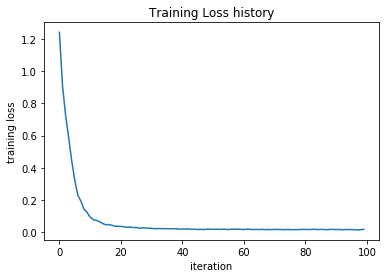

In [6]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=True)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [7]:
from modules.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'datasets/cifar-10-batches-py'
    
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [8]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration [0 / 1000] : loss = 2.302954
iteration [1 / 1000] : loss = 2.302974
iteration [2 / 1000] : loss = 2.302955
iteration [3 / 1000] : loss = 2.302974
iteration [4 / 1000] : loss = 2.302966
iteration [5 / 1000] : loss = 2.302963
iteration [6 / 1000] : loss = 2.302955
iteration [7 / 1000] : loss = 2.302961
iteration [8 / 1000] : loss = 2.302956
iteration [9 / 1000] : loss = 2.302953
iteration [10 / 1000] : loss = 2.302967
iteration [11 / 1000] : loss = 2.302961
iteration [12 / 1000] : loss = 2.302954
iteration [13 / 1000] : loss = 2.302962
iteration [14 / 1000] : loss = 2.302951
iteration [15 / 1000] : loss = 2.302944
iteration [16 / 1000] : loss = 2.302974
iteration [17 / 1000] : loss = 2.302951
iteration [18 / 1000] : loss = 2.302946
iteration [19 / 1000] : loss = 2.302960
iteration [20 / 1000] : loss = 2.302937
iteration [21 / 1000] : loss = 2.302942
iteration [22 / 1000] : loss = 2.302916
iteration [23 / 1000] : loss = 2.302934
iteration [24 / 1000] : loss = 2.302931
iteration 

# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

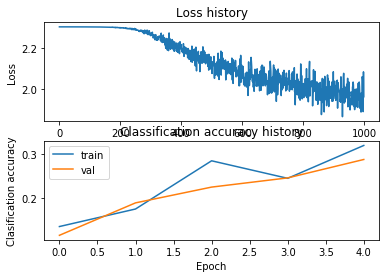

In [9]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

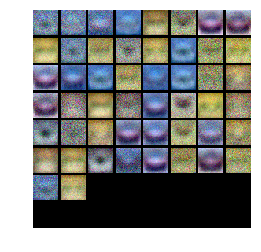

In [10]:
from modules.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

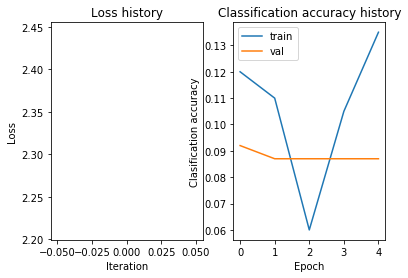

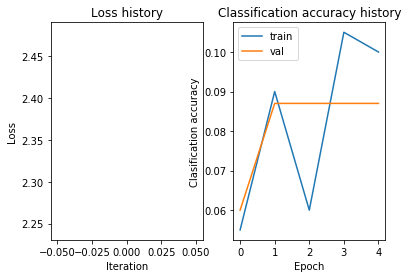

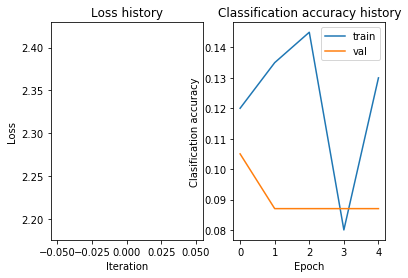

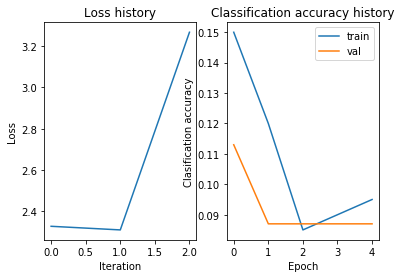

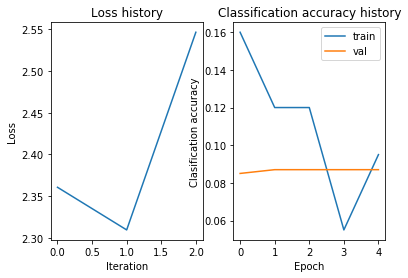

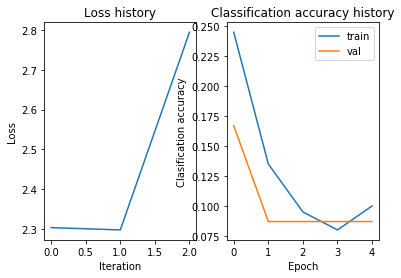

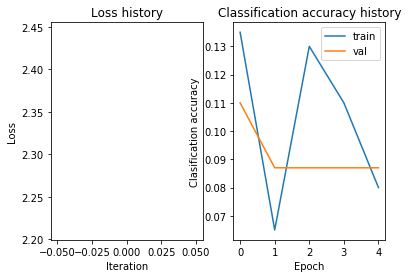

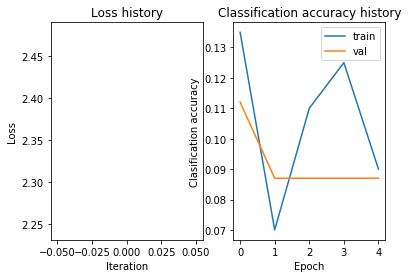

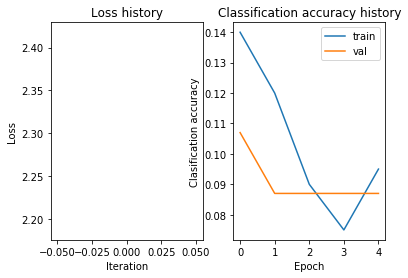

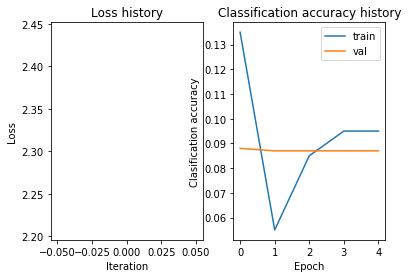

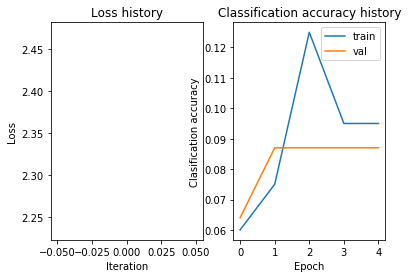

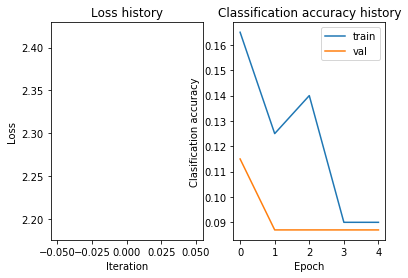

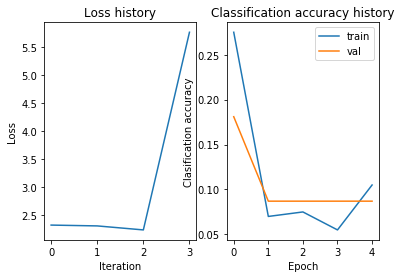

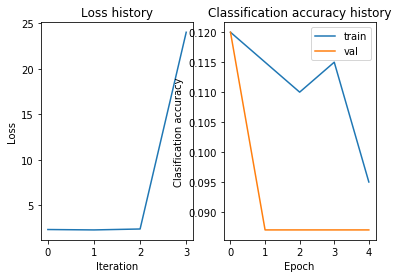

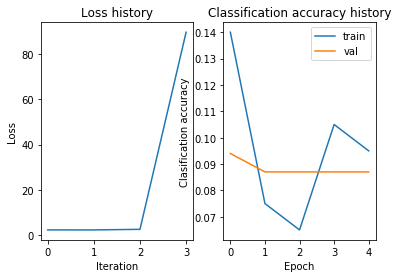

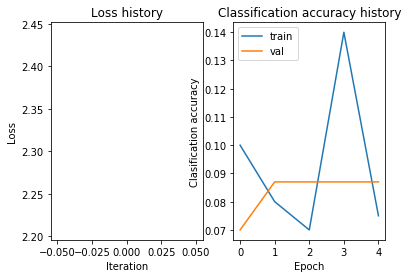

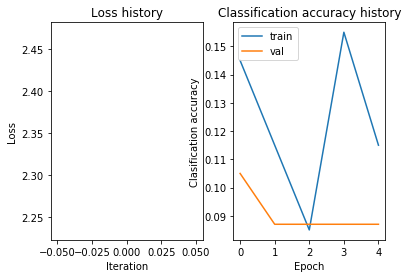

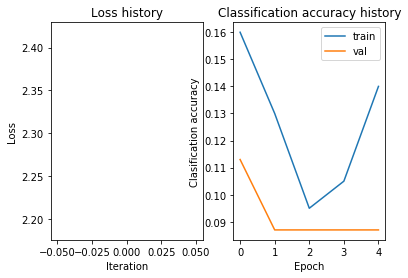

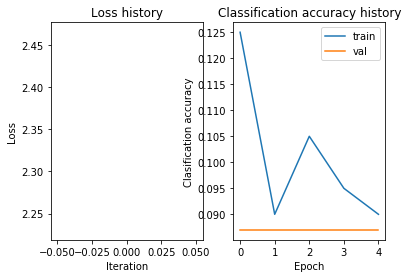

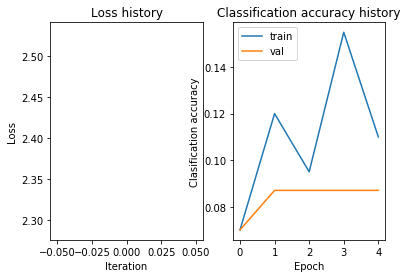

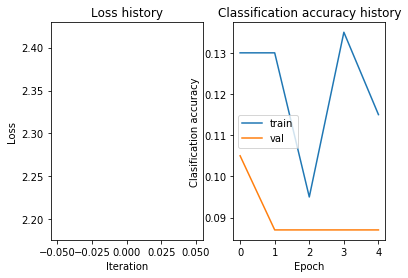

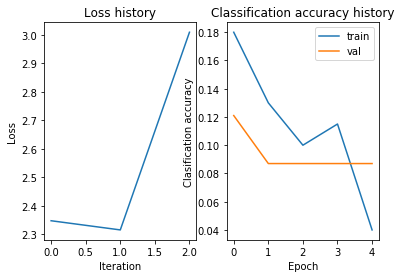

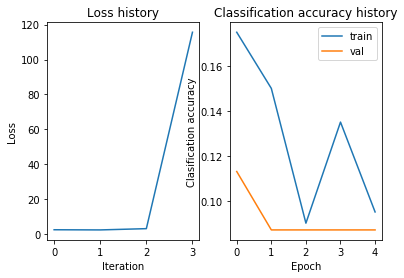

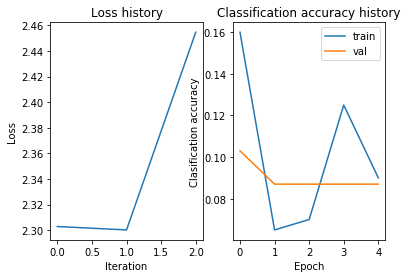

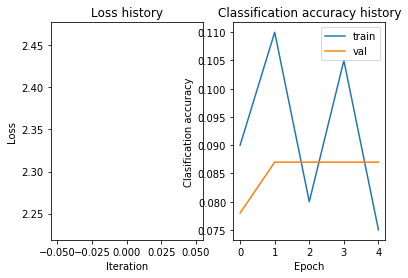

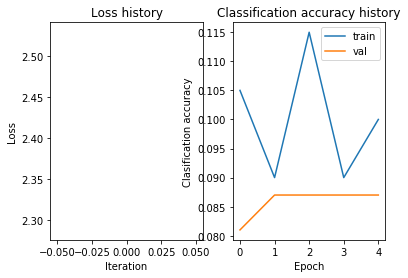

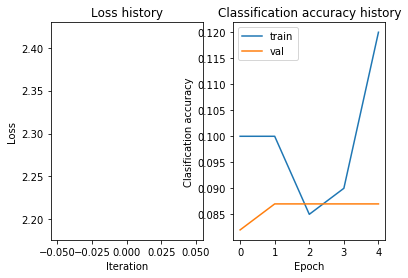

h1_size: 208 | lr: 1522.859660 | reg: 0.015620 |>>>| val_acc = 0.087000
h1_size: 445 | lr: 0.048538 | reg: 0.015620 |>>>| val_acc = 0.087000
h1_size: 208 | lr: 85.791995 | reg: 0.015620 |>>>| val_acc = 0.087000
h1_size: 243 | lr: 0.048538 | reg: 0.015620 |>>>| val_acc = 0.087000
h1_size: 445 | lr: 85.791995 | reg: 7.741408 |>>>| val_acc = 0.087000
h1_size: 243 | lr: 1522.859660 | reg: 7.741408 |>>>| val_acc = 0.087000
h1_size: 243 | lr: 1522.859660 | reg: 3.310705 |>>>| val_acc = 0.087000
h1_size: 208 | lr: 0.048538 | reg: 0.015620 |>>>| val_acc = 0.087000
h1_size: 445 | lr: 0.048538 | reg: 3.310705 |>>>| val_acc = 0.087000
h1_size: 445 | lr: 85.791995 | reg: 3.310705 |>>>| val_acc = 0.087000
h1_size: 445 | lr: 0.048538 | reg: 7.741408 |>>>| val_acc = 0.087000
h1_size: 445 | lr: 1522.859660 | reg: 0.015620 |>>>| val_acc = 0.087000
h1_size: 243 | lr: 85.791995 | reg: 3.310705 |>>>| val_acc = 0.087000
h1_size: 208 | lr: 1522.859660 | reg: 7.741408 |>>>| val_acc = 0.087000
h1_size: 445 | 

In [66]:
#################################################################################
# Tune hyperparameters using the validation set. Store your best trained        #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################

best_net = None # store the best model into this 
best_val_acc = -1
results = {}

lr_array = []
reg_array = []
h1_size_array = []

input_size = 32*32*3
output_size = 10

X = X_train
y = y_train
X_val = X_val
y_val = y_val

num_train_epochs = 3

for i in range(num_train_epochs):
    lr_array.append(10**np.random.uniform(-5, 5))
    reg_array.append(10**np.random.uniform(-3, 6))
    h1_size_array.append(np.random.randint(1, 500))

for h1_size in h1_size_array:
    for lr in lr_array:
        for reg in reg_array:
            net = TwoLayerNet(input_size=input_size, hidden_size=h1_size, output_size=output_size)
            stats = net.train(X, y, X_val, y_val, num_iters=1000, learning_rate=lr, reg=reg, verbose=False)

            val_acc = np.mean(net.predict(X_val) == y_val)
            results[(h1_size, lr, reg)] = val_acc

            plt.subplot(1, 2, 1)
            plt.plot(stats['loss_history'])
            plt.title('Loss history')
            plt.xlabel('Iteration')
            plt.ylabel('Loss')

            plt.subplot(1, 2, 2)
                            plt.plot(stats['train_acc_history'], label='train')
            plt.plot(stats['val_acc_history'], label='val')
            plt.title('Classification accuracy history')
            plt.xlabel('Epoch')
            plt.ylabel('Clasification accuracy')
            plt.legend()
            plt.show()

            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_net = net
            else:
                del net
                del stats

for h1_size, lr, reg in results:
    val_acc = results[(h1_size, lr, reg)]
    print('h1_size: %d | lr: %f | reg: %f |>>>| val_acc = %f' %(h1_size, lr, reg, val_acc))
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

START...............
hyper-params sampling DONE..............
STARTING the TRAINING procedure............
hyper-params sampling DONE..............
STARTING the TRAINING procedure............
iteration [0 / 1000] : loss = 2.927865
iteration [1 / 1000] : loss = 2.867149
iteration [2 / 1000] : loss = 2.815002
iteration [3 / 1000] : loss = 2.767644
iteration [4 / 1000] : loss = 2.724702
iteration [5 / 1000] : loss = 2.685710
iteration [6 / 1000] : loss = 2.650312
iteration [7 / 1000] : loss = 2.618203
iteration [8 / 1000] : loss = 2.589047
iteration [9 / 1000] : loss = 2.562580
iteration [10 / 1000] : loss = 2.538564
iteration [11 / 1000] : loss = 2.516759
iteration [12 / 1000] : loss = 2.496986
iteration [13 / 1000] : loss = 2.479025
iteration [14 / 1000] : loss = 2.462729
iteration [15 / 1000] : loss = 2.447936
iteration [16 / 1000] : loss = 2.434509
iteration [17 / 1000] : loss = 2.422320
iteration [18 / 1000] : loss = 2.411265
iteration [19 / 1000] : loss = 2.401225
iteration [20 / 100

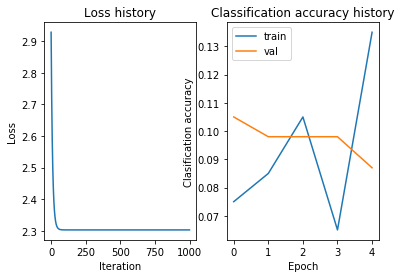

iteration [0 / 1000] : loss = 704.127709
iteration [1 / 1000] : loss = 2131577.173020
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = inf
iteration [27 / 1000] : loss = inf
iteration [2

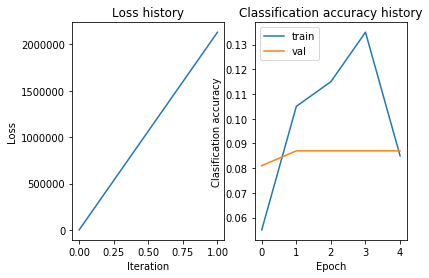

iteration [0 / 1000] : loss = 2.921639
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = inf
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : l

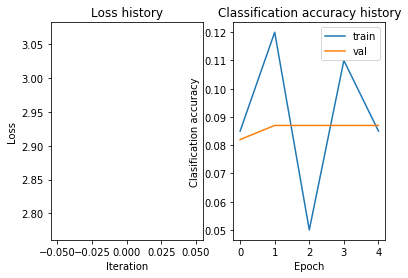

iteration [0 / 1000] : loss = 700.700636
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = nan
iteration [19 / 1000] : loss = nan
iteration [20 / 1000] : loss = nan
iteration [21 / 1000] : loss = nan
iteration [22 / 1000] : loss = nan
iteration [23 / 1000] : loss = nan
iteration [24 / 1000] : loss = nan
iteration [25 / 1000] : loss = nan
iteration [26 / 1000] : loss = nan
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] :

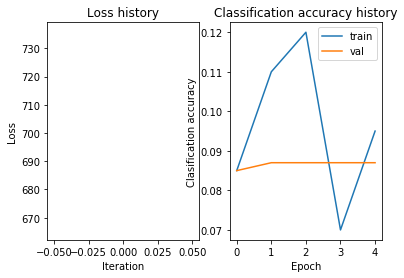

iteration [0 / 1000] : loss = 3.235754
iteration [1 / 1000] : loss = 3.145176
iteration [2 / 1000] : loss = 3.067335
iteration [3 / 1000] : loss = 2.996722
iteration [4 / 1000] : loss = 2.932590
iteration [5 / 1000] : loss = 2.874410
iteration [6 / 1000] : loss = 2.821573
iteration [7 / 1000] : loss = 2.773630
iteration [8 / 1000] : loss = 2.730123
iteration [9 / 1000] : loss = 2.690640
iteration [10 / 1000] : loss = 2.654793
iteration [11 / 1000] : loss = 2.622269
iteration [12 / 1000] : loss = 2.592738
iteration [13 / 1000] : loss = 2.565934
iteration [14 / 1000] : loss = 2.541611
iteration [15 / 1000] : loss = 2.519529
iteration [16 / 1000] : loss = 2.499494
iteration [17 / 1000] : loss = 2.481304
iteration [18 / 1000] : loss = 2.464801
iteration [19 / 1000] : loss = 2.449813
iteration [20 / 1000] : loss = 2.436215
iteration [21 / 1000] : loss = 2.423872
iteration [22 / 1000] : loss = 2.412671
iteration [23 / 1000] : loss = 2.402501
iteration [24 / 1000] : loss = 2.393273
iteration 

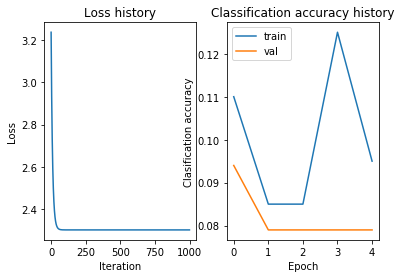

iteration [0 / 1000] : loss = 1046.491803
iteration [1 / 1000] : loss = 3171401.412396
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = inf
iteration [27 / 1000] : loss = inf
iteration [

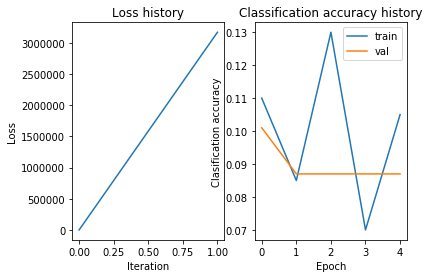

iteration [0 / 1000] : loss = 3.229832
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = inf
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : l

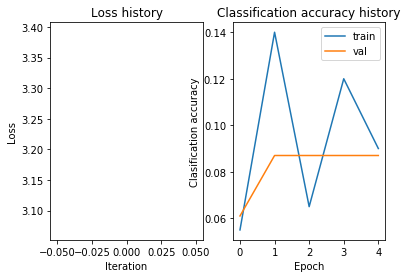

iteration [0 / 1000] : loss = 1056.434001
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = nan
iteration [19 / 1000] : loss = nan
iteration [20 / 1000] : loss = nan
iteration [21 / 1000] : loss = nan
iteration [22 / 1000] : loss = nan
iteration [23 / 1000] : loss = nan
iteration [24 / 1000] : loss = nan
iteration [25 / 1000] : loss = nan
iteration [26 / 1000] : loss = nan
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] 

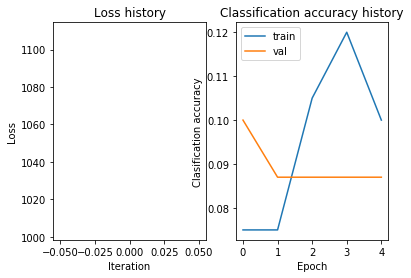

iteration [0 / 1000] : loss = 3.542329
iteration [1 / 1000] : loss = 3.421920
iteration [2 / 1000] : loss = 3.318531
iteration [3 / 1000] : loss = 3.224672
iteration [4 / 1000] : loss = 3.139497
iteration [5 / 1000] : loss = 3.062201
iteration [6 / 1000] : loss = 2.992018
iteration [7 / 1000] : loss = 2.928367
iteration [8 / 1000] : loss = 2.870539
iteration [9 / 1000] : loss = 2.818086
iteration [10 / 1000] : loss = 2.770484
iteration [11 / 1000] : loss = 2.727247
iteration [12 / 1000] : loss = 2.688014
iteration [13 / 1000] : loss = 2.652423
iteration [14 / 1000] : loss = 2.620097
iteration [15 / 1000] : loss = 2.590783
iteration [16 / 1000] : loss = 2.564152
iteration [17 / 1000] : loss = 2.539989
iteration [18 / 1000] : loss = 2.518064
iteration [19 / 1000] : loss = 2.498153
iteration [20 / 1000] : loss = 2.480088
iteration [21 / 1000] : loss = 2.463695
iteration [22 / 1000] : loss = 2.448815
iteration [23 / 1000] : loss = 2.435311
iteration [24 / 1000] : loss = 2.423043
iteration 

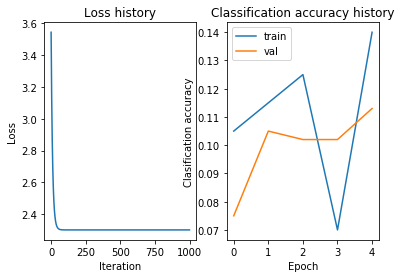

iteration [0 / 1000] : loss = 1400.023474
iteration [1 / 1000] : loss = 4245143.247141
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = inf
iteration [27 / 1000] : loss = inf
iteration [

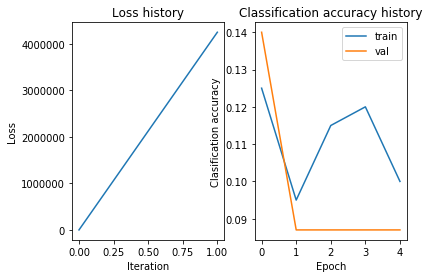

iteration [0 / 1000] : loss = 3.546197
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = inf
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : l

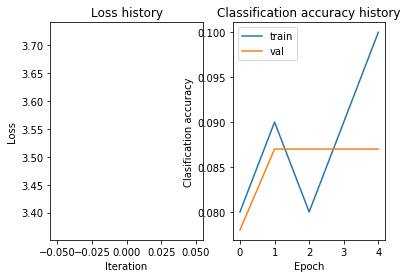

iteration [0 / 1000] : loss = 1402.452972
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = nan
iteration [19 / 1000] : loss = nan
iteration [20 / 1000] : loss = nan
iteration [21 / 1000] : loss = nan
iteration [22 / 1000] : loss = nan
iteration [23 / 1000] : loss = nan
iteration [24 / 1000] : loss = nan
iteration [25 / 1000] : loss = nan
iteration [26 / 1000] : loss = nan
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] 

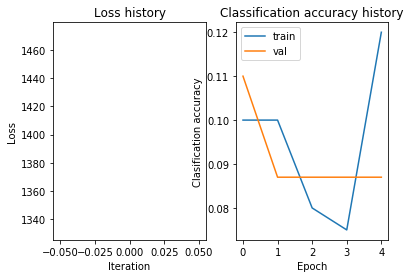

iteration [0 / 1000] : loss = 3.851894
iteration [1 / 1000] : loss = 3.701446
iteration [2 / 1000] : loss = 3.572216
iteration [3 / 1000] : loss = 3.454941
iteration [4 / 1000] : loss = 3.348507
iteration [5 / 1000] : loss = 3.251871
iteration [6 / 1000] : loss = 3.164193
iteration [7 / 1000] : loss = 3.084619
iteration [8 / 1000] : loss = 3.012356
iteration [9 / 1000] : loss = 2.946811
iteration [10 / 1000] : loss = 2.887301
iteration [11 / 1000] : loss = 2.833296
iteration [12 / 1000] : loss = 2.784277
iteration [13 / 1000] : loss = 2.739783
iteration [14 / 1000] : loss = 2.699401
iteration [15 / 1000] : loss = 2.662735
iteration [16 / 1000] : loss = 2.629478
iteration [17 / 1000] : loss = 2.599278
iteration [18 / 1000] : loss = 2.571881
iteration [19 / 1000] : loss = 2.547005
iteration [20 / 1000] : loss = 2.524421
iteration [21 / 1000] : loss = 2.503934
iteration [22 / 1000] : loss = 2.485342
iteration [23 / 1000] : loss = 2.468457
iteration [24 / 1000] : loss = 2.453138
iteration 

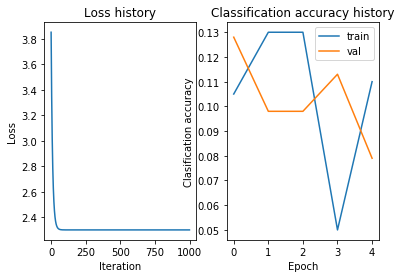

iteration [0 / 1000] : loss = 1746.704333
iteration [1 / 1000] : loss = 5298078.299267
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = inf
iteration [27 / 1000] : loss = inf
iteration [

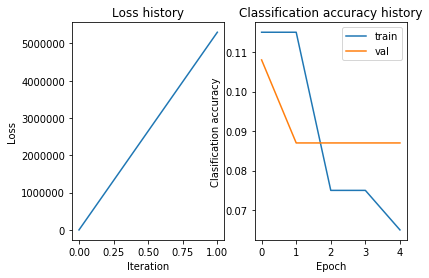

iteration [0 / 1000] : loss = 3.853511
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = inf
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : l

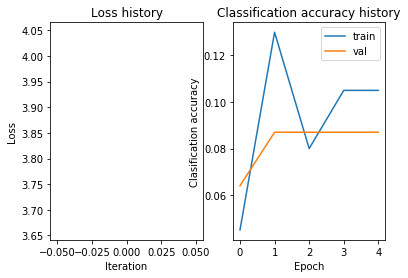

iteration [0 / 1000] : loss = 1757.154361
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = nan
iteration [19 / 1000] : loss = nan
iteration [20 / 1000] : loss = nan
iteration [21 / 1000] : loss = nan
iteration [22 / 1000] : loss = nan
iteration [23 / 1000] : loss = nan
iteration [24 / 1000] : loss = nan
iteration [25 / 1000] : loss = nan
iteration [26 / 1000] : loss = nan
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] 

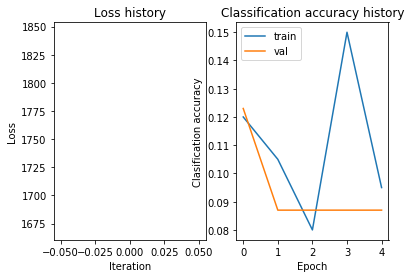

TRAINING procedure OVER..............
STOP.
...............RESULTS.....................
h1_size: 125    lr: 0.000062    reg: 402.701092    val_acc = 0.079000
h1_size: 100    lr: 0.000062    reg: 402.701092    val_acc = 0.113000
h1_size: 50    lr: 595.506122    reg: 402.701092    val_acc = 0.087000
h1_size: 75    lr: 595.506122    reg: 453788.680393    val_acc = 0.087000
h1_size: 100    lr: 595.506122    reg: 453788.680393    val_acc = 0.087000
h1_size: 125    lr: 595.506122    reg: 453788.680393    val_acc = 0.087000
h1_size: 75    lr: 0.000062    reg: 402.701092    val_acc = 0.079000
h1_size: 50    lr: 0.000062    reg: 453788.680393    val_acc = 0.087000
h1_size: 125    lr: 0.000062    reg: 453788.680393    val_acc = 0.087000
h1_size: 100    lr: 0.000062    reg: 453788.680393    val_acc = 0.087000
h1_size: 50    lr: 595.506122    reg: 453788.680393    val_acc = 0.087000
h1_size: 75    lr: 595.506122    reg: 402.701092    val_acc = 0.087000
h1_size: 100    lr: 595.506122    reg: 402.70

In [73]:
# from modules.classifiers.tune_hyperparams import tune_hyperparams
best_net = tune_hyperparams(X=X_train, y=y_train, X_val=X_val, y_val=y_val, num_train_epochs=2, verbose=True)

0.087


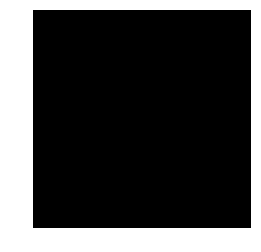

In [67]:
# visualize the weights of the best network
print(best_val_acc)
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [68]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.103


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.
1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

*Your answer*:

*Your explanation:*